In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv("C:/Users/Ayman/Downloads/BTC-USD.csv")

In [111]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [113]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [115]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


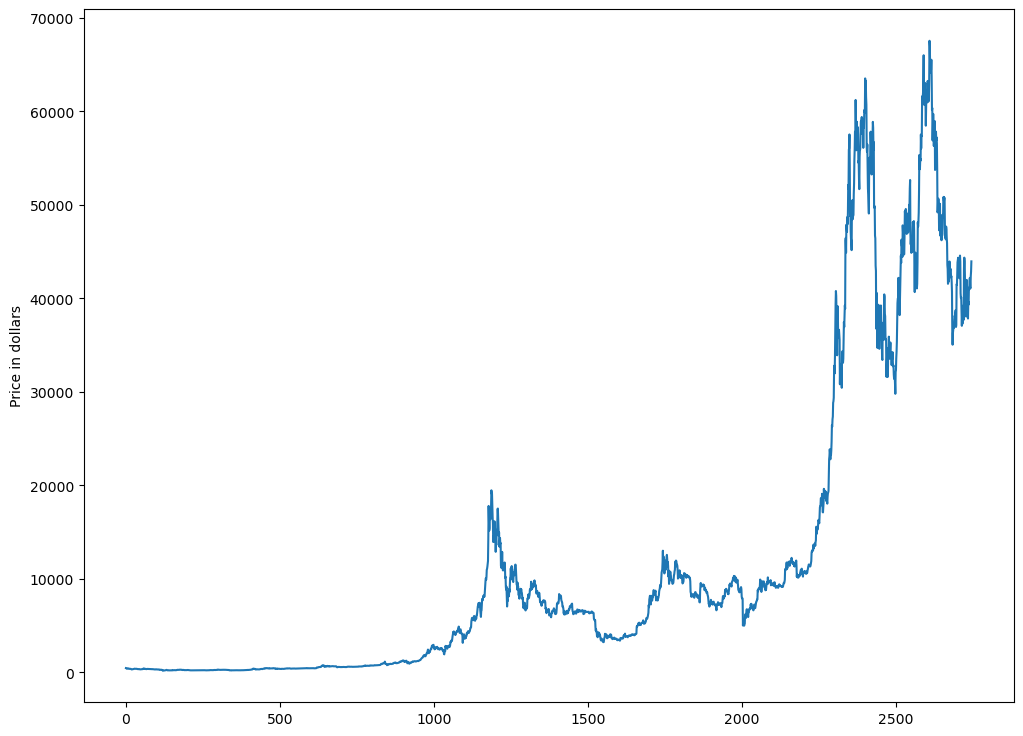

In [119]:
plt.figure(figsize=(12,9))
plt.plot(df["Open"])
plt.ylabel("Price in dollars")
plt.show()

In [121]:
df = df.drop(["Adj Close"],axis=1)

In [123]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

<Axes: >

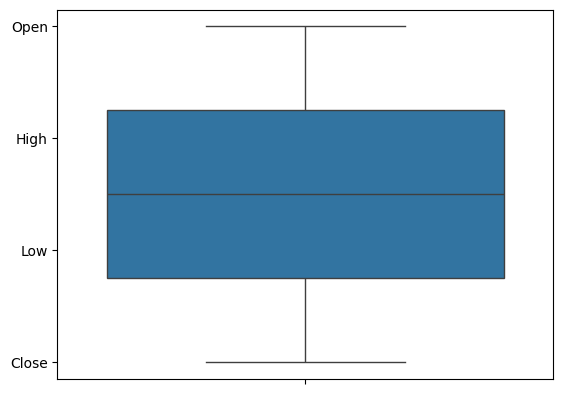

In [125]:
categories = ['Open', 'High', 'Low', 'Close']
sns.boxplot(categories)

In [127]:
split = df["Date"].str.split("-",expand=True)
df["Year"] = split[0].astype('int')
df["Month"] = split[1].astype('int')
df["Day"] = split[2].astype('int')

In [129]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


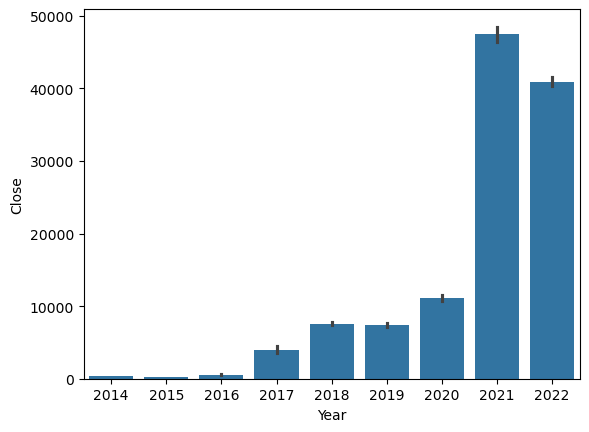

In [131]:
sns.barplot(x='Year',y="Close",data=df)
plt.show()

C:\Users\Ayman\AppData\Local\Temp\ipykernel_11080\301308805.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ayman\AppData\Local\Temp\ipykernel_11080\301308805.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ayman\AppData\Local\Temp\ipykernel_11080\3013

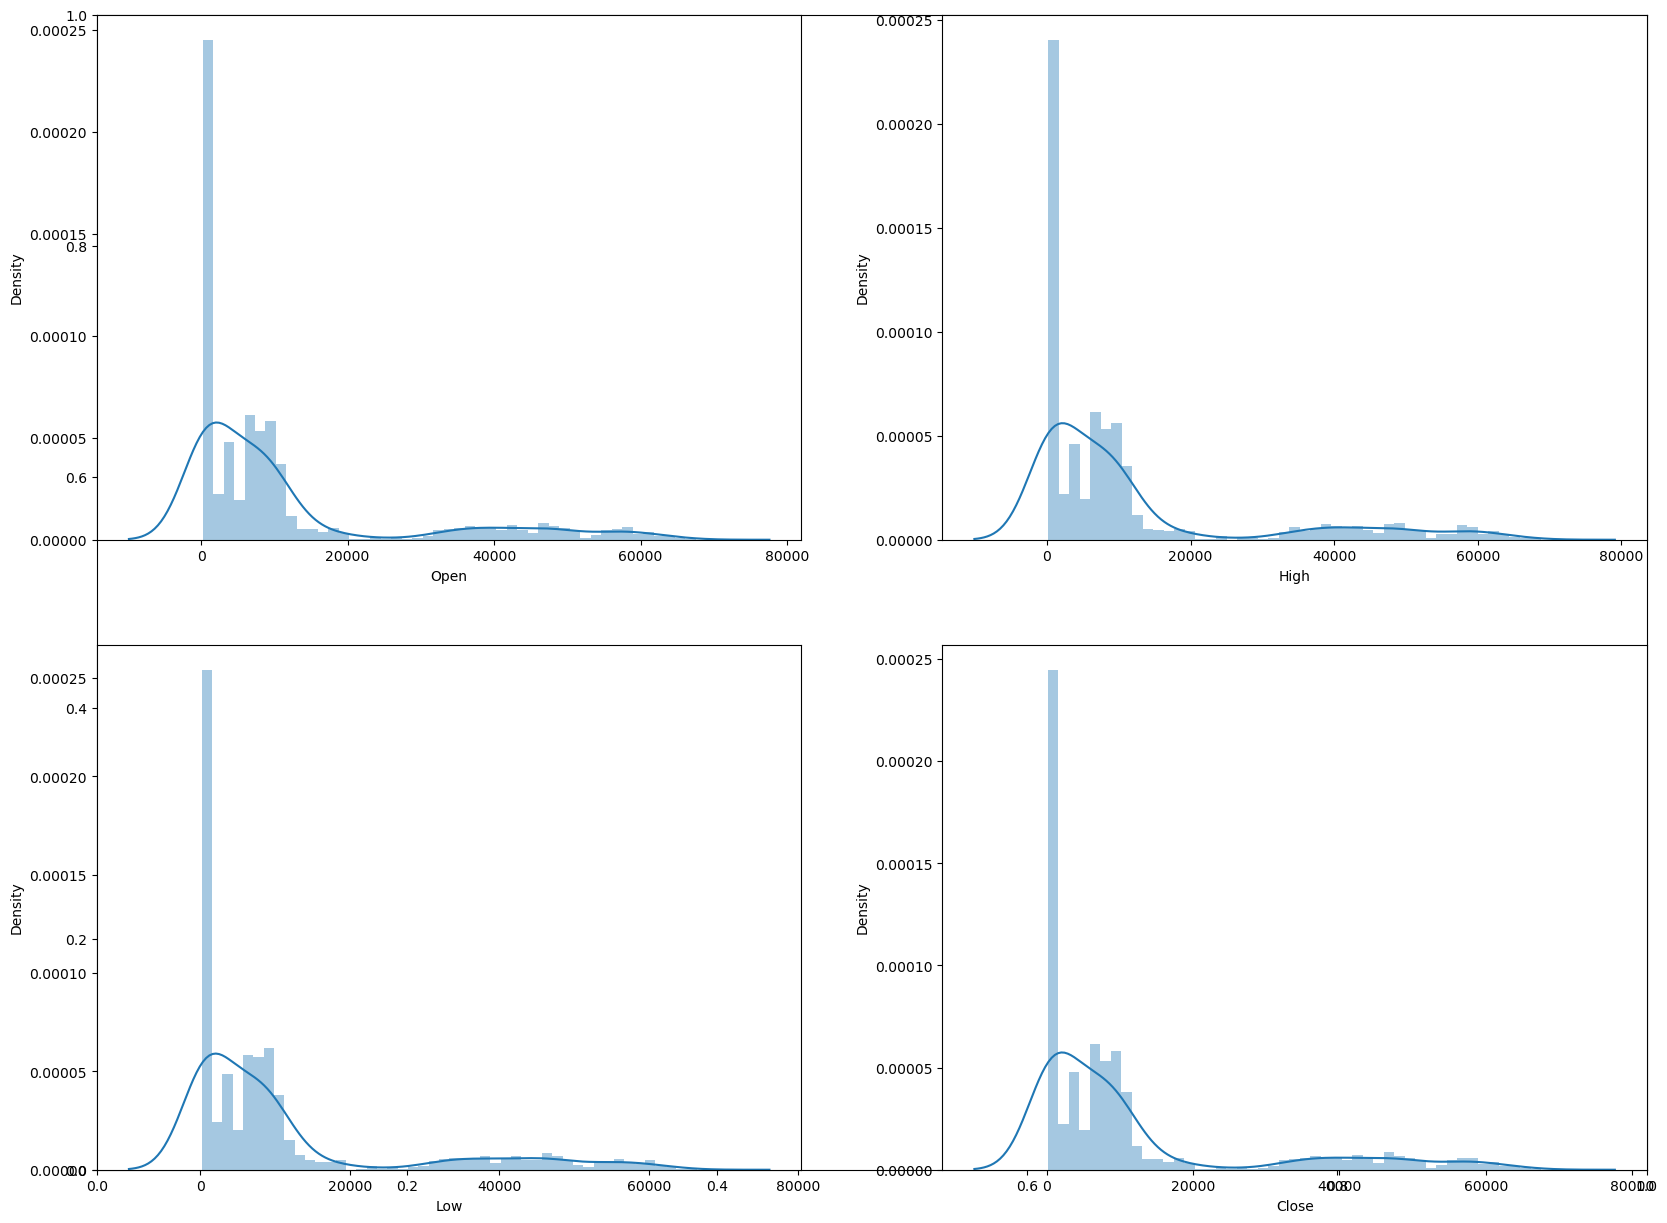

In [133]:
categories = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,15))
for i,col in enumerate(categories):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])
plt.show()

<Axes: ylabel='Open'>

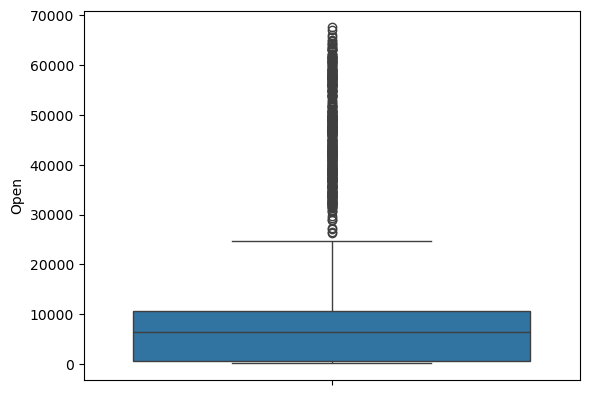

In [134]:
sns.boxplot(df["Open"])

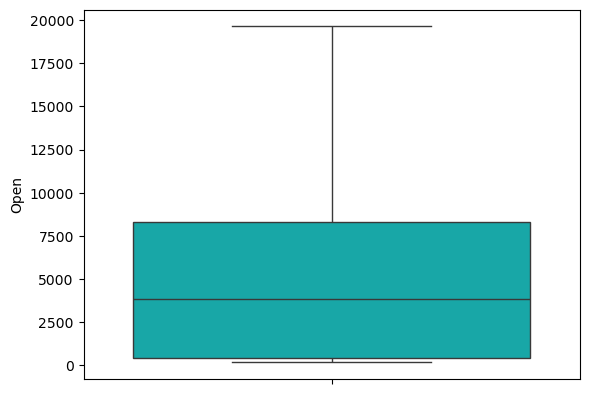

In [137]:
remove_outlires=df[df["Open"]<=21000]

sns.boxplot(remove_outlires["Open"],color='c')
plt.show()


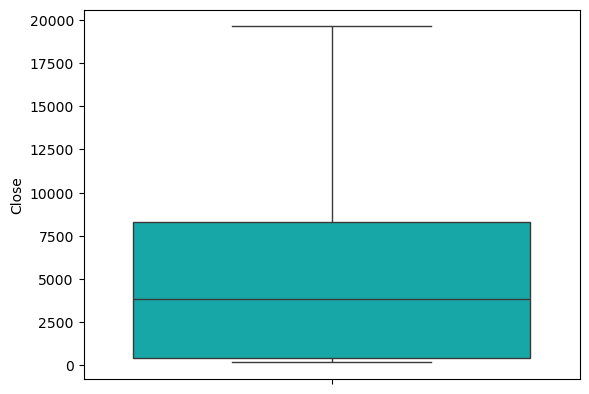

In [139]:
remove_outlires=df[df["Close"]<=21000]

sns.boxplot(remove_outlires["Close"],color='c')
plt.show()

In [183]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [185]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month',
       'Day', 'Quater', 'open-close', 'High-low', 'target'],
      dtype='object')

In [187]:
df['Quater']= np.where(df['Month']%3==0,1,0)
df.head(5)

,Date,Open,High,Low,Close,Volume,Year,Month,Day,Quater,open-close,High-low,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,19.244995,1


In [189]:
df['open-close']=df['Open']-df['Close']
df['High-low']=df['High']-df['Low']
df['target']=np.where(df['Close'].shift(-1)>df['Close'],1,0)
df.head(7)

,Date,Open,High,Low,Close,Volume,Year,Month,Day,Quater,open-close,High-low,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,19.244995,1
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,2014,9,22,1,-3.052002,9.785980,1
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,2014,9,23,1,-33.698975,45.360016,0


([<matplotlib.patches.Wedge at 0x279a8cf3e60>,
 [Text(-0.14113588564696275, 1.0909081821045472, ''),
  Text(0.14113588564696308, -1.090908182104547, '')],
 [Text(-0.07698321035288876, 0.5950408266024801, '54.1%'),
  Text(0.07698321035288894, -0.5950408266024801, '45.9%')])

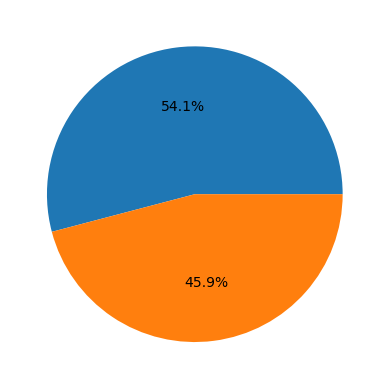

In [191]:
plt.pie(df['target'].value_counts(), autopct='%1.1f%%')

In [193]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month',
       'Day', 'Quater', 'open-close', 'High-low', 'target'],
      dtype='object')

In [201]:
X=df[['open-close', 'High-low']]
y=df['target']
scaler=StandardScaler()
scaler.fit_transform(X)


array([[ 0.02883363, -0.54525612],
       [ 0.05901681, -0.52138607],
       [ 0.0550838 , -0.5217722 ],
       ...,
       [-0.64976149,  0.30733611],
       [-1.33921574,  0.63950159],
       [-0.53442473,  0.52439356]])

In [203]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [207]:
X_train.shape
X_test.shape

(687, 2)

In [209]:
lr=LogisticRegression()
lr.fit(X_train,y_train)



LogisticRegression()

In [211]:
print(lr.score(X_test,y_test))

0.5269286754002911
